#  <font color=red> Module_08_資料聚合</font>

## 拆開資料

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.299383,0.102803
1,a,two,1.097159,-0.203645
2,b,one,-1.769893,1.136841
3,b,two,-0.232214,1.267748
4,a,one,-0.449499,-0.982907


In [ ]:
# 分組的 key 可以是序列
# 對應關係要注意
# 返回的是一個 GroupBy 的物件
grouped = df['data1'].groupby(df['key1'])  
grouped 

In [ ]:
# 一個序列
# 分組的 key 會當索引標籤
grouped.mean() 

---

In [ ]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

In [ ]:
#另一種寫法
df.groupby(['key1','key2'])['data1'].mean()

In [ ]:
means.unstack()

---

In [ ]:
df

In [ ]:
# 分組的 key 也可以是長度相符的陣列
# 分組的 key 會當索引標籤
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

---

In [ ]:
df

In [ ]:
# 直接使用資料框
# 分組的 key 也可以是欄位名稱，此時前面的資料框就要跟欄位有關
# key2 的欄位因為不是數值型態，所以不會被包含在輸出結果中，但儘量不要這樣寫
df.groupby('key1').mean() 

In [ ]:
# 這樣會是比較好的寫法
# 先 df.groupby('key1') 得到 GroupBy 的物件
# 再用 index 的方式表達要顯示那些欄位 df.groupby('key1')[['data1', 'data2']]
# 最後套用聚合方法
df.groupby('key1')[['data1', 'data2']].mean() 

---

In [ ]:
df

In [ ]:
df.groupby(['key1', 'key2']).mean()

In [ ]:
# 返回序列
# 資料列的個數，是不是遺失值都要算
df.groupby(['key1', 'key2']).size() 

---

In [ ]:
df

In [ ]:
df.groupby('key1') # GroupBy 物件

In [ ]:
# name 就是分到的每個組
# group 就是滿足這個組的所有資料 
for name, group in df.groupby('key1'): # GroupBy 物件支援疊代，會產生 2-tuple 的序列 
    print(name)
    print(group)

In [ ]:
df

In [ ]:
for name, group in df.groupby(['key1', 'key2']):
    print(name)
    print(group)

---

In [ ]:
# 放進函式 list() 看會變成如何
# 裝成 (key, value) 的 tuple
list(df.groupby('key1'))

In [ ]:
pieces = dict(list(df.groupby('key1')))
pieces

In [ ]:
# 可以用 key 找 value
pieces['b']

---

In [ ]:
df

In [ ]:
df.dtypes

In [ ]:
# 預設 axis = 0 對列操作，axis = 1 對行做操作
grouped = df.groupby(df.dtypes, axis = 1)

In [ ]:
for name, group in grouped:
    print(name)
    print(group)

---

In [ ]:
df

In [ ]:
df.groupby('key1')['data1'].mean()

In [ ]:
# 注意上面那個跟這裡的寫法，兩個出來同一個效果
df['data1'].groupby(df['key1']).mean()

In [ ]:
# 兩個框框就變資料框了
df.groupby('key1')[['data1']].mean()

In [ ]:
df[['data1']].groupby(df['key1']).mean()

---

In [ ]:
df

In [ ]:
df.groupby(['key1', 'key2'])['data2'].mean() # 返回序列

In [ ]:
df.groupby(['key1', 'key2'])[['data2']].mean() # 返回資料框

---

In [ ]:
# 分組的 key 也可以是字典或序列 
# 對應關係要注意
people = pd.DataFrame(np.random.randn(5, 5),
                      columns = ['a', 'b', 'c', 'd', 'e'],
                      index = ['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people

In [ ]:
people.iloc[2:3, [1, 2]] = np.nan
people

In [ ]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [ ]:
# 一個不會用到分組的 key 'f'，是不會有問題的
# 但如果你是寫成【列表】，長度不對就會產生例外
# 在操作時大部分的聚合方法都會忽略遺失值
by_column = people.groupby(mapping, axis = 1) 
by_column.mean()

---

In [ ]:
people

In [ ]:
map_Series = pd.Series(mapping)
map_Series

In [ ]:
people.groupby(map_Series, axis = 1).count() # 這裡的聚合方法 .count() 遺失值不會算入

---

In [ ]:
people

In [ ]:
people.groupby(len)    #名字的長度

In [ ]:
# 分組的 key 也可以是函式
# 會作用在每個索引標籤上
# 若加入參數 axis = 1 ，就會作用在欄位上
people.groupby(len).sum()

In [ ]:
people.groupby(len, axis = 1).sum()

In [ ]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

---

In [ ]:
# 也可以對索引標籤做分組
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                    names = ['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns = columns)
hier_df

In [ ]:
hier_df.groupby(level = 'cty', axis = 1).count()    #groupby後對層級索引做的處理

In [ ]:
hier_df.groupby(level = 0).count()

---

In [ ]:
sensor_data = pd.read_csv('./mod08/sensors.csv')
sensor_data

In [ ]:
group_by_sensor = sensor_data.groupby('sensor')
group_by_sensor # 返回一個 GroupBy 物件

In [ ]:
# 如果想看分組數目可用 .ngroups() 屬性
group_by_sensor.ngroups

In [ ]:
group_by_sensor.groups

---

In [ ]:
for name, group in group_by_sensor:
    print(name)
    print(group)

In [8]:
# 可以定義成函式，這樣程式碼可以重複使用，注意裡面的參數是要帶入 GroupBy 物件
def print_groups(group_object):
    for name, group in group_object:
        print(name)
        print(group[:5])

---

In [ ]:
print_groups(group_by_sensor)

In [ ]:
# 返回序列Series 
# 資料列的個數，是不是遺失值都要算
group_by_sensor.size()   

In [ ]:
group_by_sensor.count() # 對列作操作數個數，排除遺失值

In [ ]:
group_by_sensor.get_group('accel') # 可以用 GroupBy的 .get_group() 方法提取特定分組

In [ ]:
group_by_sensor.head(3) # GroupBy的方法，顯示每個分組的前三筆資料

In [ ]:
group_by_sensor.tail(3) # GroupBy的方法，顯示每個分組的後三筆資料

In [ ]:
group_by_sensor.nth(1) # GroupBy的方法，傳回第二項   #取索引1的值

In [ ]:
# GroupBy的方法，對每一組做敘述性統計量
# axis 不是數值資料，所以沒有被顯示
group_by_sensor.describe() 

---

In [ ]:
sensor_data

In [ ]:
mcg = sensor_data.groupby(['sensor', 'axis']) # 因為指定了好幾行，所以名字變成了 tuple
print_groups(mcg)

---

In [ ]:
mi = sensor_data.copy()
mi = mi.set_index(['sensor', 'axis'])
mi

In [ ]:
print_groups(mi.groupby(level = 0)) # 對索引標籤進行分組   #往上看已經有定義print_groups

In [ ]:
print_groups(mi.groupby(level = ['sensor', 'axis']))

## 套用聚合函數

In [ ]:
s = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9])
s

In [ ]:
# Return value at the given quantile.
# 找出分位數
s.quantile(0.5)

In [ ]:
s.quantile([0.25, 0.5, 0.75])

--------------

In [ ]:
s = pd.Series([1, 2, 3, 4])
s

In [ ]:
s.quantile(0.5)

In [ ]:
# Return value at the given quantile.
# 找出分位數quantile
# 第一步看位置，四個數共三格
# 在 1 + 0.25*3 = 1.75 的位置 
# 第 1 的數是 1 ，第 2 的數是 2，回推第 1.75位置的數是多少
s.quantile([0.25, 0.5, 0.75, 0.9])

---------

In [ ]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

In [ ]:
# 如果沒寫 [['data1', 'data2']]，會出現警告，因為非數值的 key2 沒辦法算分位數
grouped = df.groupby('key1')[['data1', 'data2']]

In [ ]:
grouped.quantile(0.5)

In [ ]:
grouped.mean()

In [ ]:
# 另一種寫法
# 用 .agg() 方法，傳入聚合的函數  #好處是可以同時運用多個函數
grouped.agg(np.mean)

In [ ]:
# 也可以傳入字串，但有些沒辦法被辨識出
grouped.agg('mean')

---

In [ ]:
print_groups(grouped)

In [6]:
# 注意 arr 傳入的會是序列
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [ ]:
# 傳入自定義的函數
grouped.agg(peak_to_peak)

In [7]:
def max_Series(arr):
    return max(arr.map(abs))

In [ ]:
# 傳入自定義的函數
grouped.agg(max_Series)

In [ ]:
grouped.describe()

---

In [ ]:
tips = pd.read_csv('./mod08/tips.csv')
tips

In [ ]:
# 加入小費佔總結帳金額的比例

tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

In [ ]:
grouped = tips.groupby(['day', 'smoker'])
print_groups(grouped)

In [ ]:
# 關注欄位 tip_pct
grouped_pct = grouped['tip_pct']

In [ ]:
grouped_pct.agg('mean')

In [ ]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

In [ ]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)]) # 傳入 (name, function) 的 tuple

---

In [ ]:
print_groups(grouped)

In [ ]:
result = grouped[['tip_pct', 'total_bill']].agg(['count', 'mean', 'max'])
result

In [ ]:
result['tip_pct']

In [ ]:
# Durchschnitt 是德語的平均，Abweichung 是德語的變異數
grouped[['tip_pct', 'total_bill']].agg([('Durchschnitt', 'mean'), ('Abweichung', np.var)])   #var 標準差

---

In [ ]:
print_groups(grouped)

In [ ]:
grouped.agg({'tip': np.max, 'size': 'sum'})  # 針對不同行套用不同的函式

In [ ]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

---

In [ ]:
tips

In [ ]:
tips.groupby(['day','smoker']).mean()    #被groupby的 就會變成index

In [ ]:
# 如果加入參數 as_index = False，day 與 smoker 就不會變成索引標籤
tips.groupby(['day', 'smoker'], as_index = False).mean()

-----------

In [ ]:
sensor_data = pd.read_csv('./mod08/sensors.csv')
sensor_data[:5]

In [ ]:
mi = sensor_data.copy()
mi = mi.set_index(['sensor', 'axis'])
mi[:5]

In [ ]:
sensor_axis_grouping = mi.groupby(level = ['sensor', 'axis'])   #要groupby index要加個level
print_groups(sensor_axis_grouping)

In [ ]:
sensor_axis_grouping.agg(np.mean)

---

In [ ]:
sensor_data

In [ ]:
sensor_data.groupby(['sensor', 'axis']).agg(np.mean) # 預設 as_index = True

In [ ]:
sensor_data.groupby(['sensor', 'axis'], as_index = False).agg(np.mean) 

---

In [ ]:
print_groups(sensor_axis_grouping)

In [ ]:
sensor_axis_grouping.mean()

In [ ]:
sensor_axis_grouping.agg(np.mean)

In [ ]:
sensor_axis_grouping.agg([np.sum, np.std])

In [ ]:
# 針對不同行套用不同的函式
# len 在算序列的長度    #len是對分組的每個資料框取幾筆資料
sensor_axis_grouping.agg({'interval': len, 'reading': np.mean})       


#參考這個執行結果去算有幾筆資料   print_groups(sensor_axis_grouping)  print_groups 會印出5筆，可是每組都只有4筆 所以表示他們真的都只有4筆

In [ ]:
sensor_axis_grouping['reading'].mean() # 返回序列

In [ ]:
sensor_axis_grouping[['reading']].mean() # 返回資料框

## 轉換分組資料

In [ ]:
df = pd.DataFrame({'A': 'a b a'.split(),
                   'B': [1, 2, 3],
                   'C': [4, 6, 5]})
df

In [ ]:
g = df.groupby('A')

In [ ]:
print_groups(g)

-------------

In [ ]:
g[['B', 'C']].mean()

In [ ]:
g[['B', 'C']].apply(lambda x: x + 2) 

In [ ]:
g[['B', 'C']].apply(lambda x: x / x.sum())

In [ ]:
print_groups(g)

In [ ]:
g[['B', 'C']].apply(lambda x: x.max() - x.min())

In [ ]:
g.apply(lambda x: x.C.max())

------------------

In [ ]:
tips = pd.read_csv('./mod08/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

In [5]:
def top(df, n = 5, column = 'tip_pct'):
    return df.sort_values(by = column)[-n:]   #取最大

top(tips, n = 6)

NameError: name 'tips' is not defined

---------

In [ ]:
print_groups(tips.groupby('smoker'))

In [ ]:
# 序列的 .apply() 方法作用在值上，資料框的 .apply() 方法作用在序列上， GroupBy 物件作用在分組後的每個資料框或序列上
# 每看到一個群組就會呼叫 top 函式
# 會用類似 pandas.concat 的方式串連起來，用分組名稱標示每塊資料，所以最後出來的結果帶有階層式索引
#看上面的top字定義函式

tips.groupby('smoker').apply(top)

-----------------------

In [ ]:
print_groups(tips.groupby(['smoker', 'day']))

In [ ]:
# 有其他參數或關鍵字要傳的話，將他們寫在函式名稱後面即可

tips.groupby(['smoker', 'day']).apply(top, n = 1, column = 'total_bill')   #n-1顯示一個，所以每組都顯示最後一筆，最後再把每組的結果串聯起來

---

In [ ]:
print_groups(tips.groupby('smoker'))

In [ ]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

In [ ]:
result.stack()

---------

In [ ]:
tips

In [ ]:
print_groups(tips.groupby('smoker')['tip_pct'])

In [ ]:
tips.groupby('smoker')['tip_pct'].apply(lambda x: x.describe())

---

In [ ]:
print_groups(tips.groupby('smoker'))

In [ ]:
tips.groupby('smoker').apply(top)   #tip_pct最大的五筆

In [ ]:
tips.groupby('smoker', group_keys = False).apply(top) # 關閉分組索引製作功能

---

In [4]:
# 分位數與購物籃分析

frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})
frame

,data1,data2
0,0.697092,-2.348700
1,0.576003,-0.562828
2,0.277275,0.802813
3,-0.816284,2.036062
4,-0.268302,0.785688
...,...,...
995,-0.243651,-0.844934
996,-0.660795,-1.519197
997,0.550623,0.247407
998,-0.808339,-0.769361


In [ ]:
quartiles = pd.cut(frame.data1, 4)
quartiles[:10]

In [ ]:
grouped = frame.data2.groupby(quartiles)     
print_groups(grouped)

In [ ]:
#上題詳細說明
#照索引標籤
#groupby(quartiles)  就會區分成四個 [(-3.42, -1.722] < (-1.722, -0.0303] < (-0.0303, 1.661] < (1.661, 3.352]]
#data2 的 -1.147472的索引標籤是0   所以被分到0裡面去
                          data2
0       (1.661, 3.352]  -1.147472
1    (-1.722, -0.0303]  -1.207570
2      (-3.42, -1.722]  -0.888669
3    (-1.722, -0.0303]  -0.862125
4    (-1.722, -0.0303]   1.087604
5     (-0.0303, 1.661]
6    (-1.722, -0.0303]
7    (-1.722, -0.0303]
8     (-0.0303, 1.661]
9    (-1.722, -0.0303]

In [ ]:
grouped.max()

In [3]:
def get_stats(group):
    return {'min': group.min(), 
            'max': group.max(),
            'count': group.count(),
            'mean': group.mean()} 

grouped.apply(get_stats)

NameError: name 'grouped' is not defined

In [ ]:
# 寫成字典會得到跟剛剛一樣的效果，出來的字典型態會被轉換成序列在串連起來
def get_stats(group):
    return  {'min': group.min(), 
            'max': group.max(),
            'count': group.count(),
            'mean': group.mean()}

grouped.apply(get_stats)

In [ ]:
grouped.apply(get_stats).unstack()

---

In [ ]:
frame

In [ ]:
#把 data1分成10個桶子
grouping = pd.qcut(frame.data1, 10)   
grouping

In [ ]:
# 如果加入參數 labels = False，會把桶子名改成數值，從 0 開始算起。  
grouping = pd.qcut(frame.data1, 10,labels=False)
grouping

#索引0 在第九個桶子  / 索引1  在第4個桶子  

In [ ]:
grouped = frame.data2.groupby(grouping)
print_groups(grouped)    

#索引0 在第九個桶子  / 索引1  在第4個桶子  

In [ ]:
grouped.apply(get_stats)

In [ ]:
grouped.apply(get_stats).unstack()

---

In [ ]:
df = pd.DataFrame({'key': ['a', 'b', 'c']*4,
                   'value': np.arange(12.)})
df

In [ ]:
g = df.groupby('key')['value']

In [ ]:
print_groups(g)

In [ ]:
g.mean()

In [ ]:
g.apply(lambda x: x.mean())

In [ ]:
g.apply(lambda x: np.mean(x))

-----------

In [ ]:
df

In [ ]:
g = df.groupby('key')['value']
print_groups(g)

In [ ]:
# 注意 GroupBy 物件的 .transform() 方法的效果
# 可以產生一個常數，用於廣播到所有分組
# 可以產生跟輸入分組一樣大小的一個物件
# 它的輸入不能是 mutate 類型
g.transform(lambda x: x.mean())

In [ ]:
g.transform('mean')

---------------

In [ ]:
df

In [ ]:
g = df.groupby('key')['value']
print_groups(g)

In [ ]:
# 這時跟用 .apply() 方法同效果
g.transform(lambda x: x*2)

In [ ]:
g.apply(lambda x: x*2)

In [ ]:
g.transform(lambda x: x.rank(ascending = False))

--------------

In [ ]:
df

In [ ]:
g = df.groupby('key')['value']
print_groups(g)

In [ ]:
def normailze(x):
    return (x - x.mean())/x.std()

In [ ]:
# 沒有聚合效果，所以跟 .apply() 產生同一的結果
g.transform(normailze)

In [ ]:
g.apply(normailze)

---

In [ ]:
df

In [ ]:
g = df.groupby('key')['value']
print_groups(g)

In [ ]:
g.transform('mean')

In [ ]:
g.transform('std')

In [ ]:
#　這種方法叫做未包裝分組 (unwrapped)
(df['value'] - g.transform('mean'))/g.transform('std')

-------------

In [10]:
transform_data = pd.DataFrame({ 'Label': ['A', 'C', 'B', 'A', 'C'],
                                'Values': [0, 1, 2, 3, 4],
                                'Values2': [5, 6, 7, 8, 9],
                                'Other': ['foo', 'bar', 'baz', 
                                          'fiz', 'buz']},
                              index = list('VWXYZ'))
transform_data

,Label,Values,Values2,Other
V,A,0,5,foo
W,C,1,6,bar
X,B,2,7,baz
Y,A,3,8,fiz
Z,C,4,9,buz


In [ ]:
grouped_by_label = transform_data.groupby('Label')
print_groups(grouped_by_label)

In [ ]:
grouped_by_label[['Values', 'Values2']].transform(lambda x: x + 10)

---

In [11]:
df = pd.DataFrame({ 'Label': list("ABABAB"),
                    'Values': [10, 20, 11, np.nan, 12, 22]})
df

,Label,Values
0,A,10.0
1,B,20.0
2,A,11.0
3,B,NaN
4,A,12.0
5,B,22.0


In [ ]:
grouped = df.groupby('Label')
print_groups(grouped)

In [ ]:
grouped.mean()

In [ ]:
# 遺失值按照分組的平均值來填
filled_NaNs = grouped.transform(lambda x: x.fillna(x.mean()))
filled_NaNs

---

In [12]:
# 從平均值 0.5，標準差 2 的常態分佈選出 365*3 個數
np.random.seed(123456)
data = pd.Series(np.random.normal(0.5, 2, 365*3), 
                 index = pd.date_range('2013-01-01', periods = 365*3))
data

2013-01-01    1.438225
2013-01-02   -0.065727
2013-01-03   -2.518117
2013-01-04   -1.771265
2013-01-05    2.924224
                ...   
2015-12-27   -0.276625
2015-12-28    0.259735
2015-12-29    1.404361
2015-12-30   -0.106687
2015-12-31    1.796756
Freq: D, Length: 1095, dtype: float64

In [14]:
# window: 窗要多大
# min_periods: 窗裡面最少有幾個值就算出結果
periods = 100
data.rolling(window = periods, min_periods = periods).mean()

2013-01-01         NaN
2013-01-02         NaN
2013-01-03         NaN
2013-01-04         NaN
2013-01-05         NaN
                ...   
2015-12-27    0.811402
2015-12-28    0.835961
2015-12-29    0.850998
2015-12-30    0.842293
2015-12-31    0.848419
Freq: D, Length: 1095, dtype: float64

In [15]:
periods = 100
rolling = data.rolling(window = periods, min_periods = periods).mean().dropna()
rolling

2013-04-10    0.073603
2013-04-11    0.057313
2013-04-12    0.089255
2013-04-13    0.133248
2013-04-14    0.175876
                ...   
2015-12-27    0.811402
2015-12-28    0.835961
2015-12-29    0.850998
2015-12-30    0.842293
2015-12-31    0.848419
Freq: D, Length: 996, dtype: float64

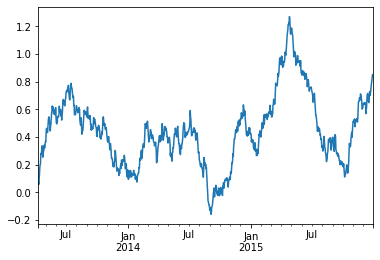

In [16]:
rolling.plot(); # 之後會有專門的章節介紹

--------------

In [17]:
rolling

2013-04-10    0.073603
2013-04-11    0.057313
2013-04-12    0.089255
2013-04-13    0.133248
2013-04-14    0.175876
                ...   
2015-12-27    0.811402
2015-12-28    0.835961
2015-12-29    0.850998
2015-12-30    0.842293
2015-12-31    0.848419
Freq: D, Length: 996, dtype: float64

In [19]:
# 注意現在的索引標籤是 datetime 資料型態
group_key = lambda x: x.year
groups = rolling.groupby(group_key) # 別忘了 .groupby() 方法也可帶入函式，會作用在每個索引標籤上
print_groups(groups)

2013
2013-04-10    0.073603
2013-04-11    0.057313
2013-04-12    0.089255
2013-04-13    0.133248
2013-04-14    0.175876
Freq: D, dtype: float64
2014
2014-01-01    0.117808
2014-01-02    0.094268
2014-01-03    0.095311
2014-01-04    0.109263
2014-01-05    0.154128
Freq: D, dtype: float64
2015
2015-01-01    0.422732
2015-01-02    0.419439
2015-01-03    0.365094
2015-01-04    0.383965
2015-01-05    0.363668
Freq: D, dtype: float64


In [20]:
groups.agg([np.mean, np.std])

,mean,std
2013,0.454233,0.171988
2014,0.286502,0.182040
2015,0.599447,0.275786


---------

In [21]:
print_groups(rolling.groupby(group_key))

2013
2013-04-10    0.073603
2013-04-11    0.057313
2013-04-12    0.089255
2013-04-13    0.133248
2013-04-14    0.175876
Freq: D, dtype: float64
2014
2014-01-01    0.117808
2014-01-02    0.094268
2014-01-03    0.095311
2014-01-04    0.109263
2014-01-05    0.154128
Freq: D, dtype: float64
2015
2015-01-01    0.422732
2015-01-02    0.419439
2015-01-03    0.365094
2015-01-04    0.383965
2015-01-05    0.363668
Freq: D, dtype: float64


In [22]:
zscore = lambda x: (x - x.mean())/x.std()
normed = rolling.groupby(group_key).transform(zscore)
normed

2013-04-10   -2.213125
2013-04-11   -2.307837
2013-04-12   -2.122115
2013-04-13   -1.866325
2013-04-14   -1.618471
                ...   
2015-12-27    0.768548
2015-12-28    0.857598
2015-12-29    0.912124
2015-12-30    0.880561
2015-12-31    0.902772
Freq: D, Length: 996, dtype: float64

In [23]:
normed.groupby(group_key).agg([np.mean, np.std])

,mean,std
2013,5.292341e-16,1.0
2014,-1.022014e-16,1.0
2015,2.281280e-16,1.0


------------

In [24]:
compared = pd.DataFrame({'Original': rolling,
                         'Normed': normed})
compared

,Original,Normed
2013-04-10,0.073603,-2.213125
2013-04-11,0.057313,-2.307837
2013-04-12,0.089255,-2.122115
2013-04-13,0.133248,-1.866325
2013-04-14,0.175876,-1.618471
...,...,...
2015-12-27,0.811402,0.768548
2015-12-28,0.835961,0.857598
2015-12-29,0.850998,0.912124
2015-12-30,0.842293,0.880561


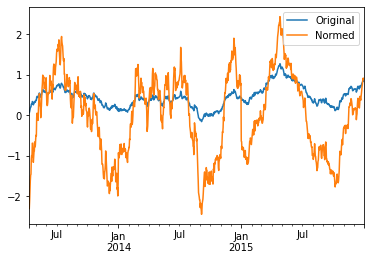

In [25]:
# 標準化完的資料再視覺化，更容易理解也更有利於分析
compared.plot();

## 過濾分組資料

In [26]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'Label': list('AABCCC'),
                   'Values': [1, 2, 3, 4, np.nan, 8]})
df

,Label,Values
0,A,1.0
1,A,2.0
2,B,3.0
3,C,4.0
4,C,NaN
5,C,8.0


In [27]:
print_groups(df.groupby('Label'))

A
  Label  Values
0     A     1.0
1     A     2.0
B
  Label  Values
2     B     3.0
C
  Label  Values
3     C     4.0
4     C     NaN
5     C     8.0


In [28]:
# GroupBy 物件的 .filter() 方法裡面放函式，函式返回的是布林值
# 把分完組的資料框或序列，一個一個帶入函式，True 的留下來，False 的會被過濾掉，再返回原始資料
f = lambda x: x.Values.count() > 1 # 序列的 .count() 方法沒算遺失值
df.groupby('Label').filter(f)

,Label,Values
0,A,1.0
1,A,2.0
3,C,4.0
4,C,NaN
5,C,8.0


In [29]:
# 只要組裡有遺失值，整組就被刪了!
f = lambda x: x.Values.isnull().sum() == 0
df.groupby('Label').filter(f)

,Label,Values
0,A,1.0
1,A,2.0
2,B,3.0


------------

In [36]:
df

,Label,Values
0,A,1.0
1,A,2.0
2,B,3.0
3,C,4.0
4,C,NaN
5,C,8.0


In [37]:
grouped = df.groupby('Label')
print_groups(grouped)

A
  Label  Values
0     A     1.0
1     A     2.0
B
  Label  Values
2     B     3.0
C
  Label  Values
3     C     4.0
4     C     NaN
5     C     8.0


In [38]:
grouped.mean()

,Values
Label,
A,1.5
B,3.0
C,6.0


In [39]:
# 先算出每組的平均，再取平均
group_mean = grouped.mean().mean()
group_mean

Values    3.5
dtype: float64

In [47]:
# 比組的平均差距高過 2 留下，其他全組過濾掉!
f = lambda x: abs(x.Values.mean() - group_mean) > 2.0
df.groupby('Label').filter(f)

,Label,Values
3,C,4.0
4,C,NaN
5,C,8.0


## 綜合應用

### 依分組指定填充遺失值

In [49]:
import pandas as pd
import numpy as np

s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1    1.197946
2         NaN
3   -0.423806
4         NaN
5   -0.786641
dtype: float64

In [51]:
s.mean()

-0.004167315247527337

In [50]:
# 就序列而言，把遺失值填入平均值還蠻常見
s.fillna(s.mean())

0   -0.004167
1    1.197946
2   -0.004167
3   -0.423806
4   -0.004167
5   -0.786641
dtype: float64

---

In [52]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index = states)
data

Ohio         -0.393609
New York     -0.171092
Vermont       1.786173
Florida      -0.575189
Oregon        0.820750
Nevada       -1.256530
California   -0.642246
Idaho         0.236892
dtype: float64

In [53]:
group_key

['East', 'East', 'East', 'East', 'West', 'West', 'West', 'West']

In [54]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio         -0.393609
New York     -0.171092
Vermont            NaN
Florida      -0.575189
Oregon        0.820750
Nevada             NaN
California   -0.642246
Idaho              NaN
dtype: float64

In [55]:
print_groups(data.groupby(group_key))

East
Ohio       -0.393609
New York   -0.171092
Vermont          NaN
Florida    -0.575189
dtype: float64
West
Oregon        0.820750
Nevada             NaN
California   -0.642246
Idaho              NaN
dtype: float64


In [56]:
data.groupby(group_key).mean()

East   -0.379964
West    0.089252
dtype: float64

In [57]:
# 這題用 .transform() 方法會得到一樣的結果
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio         -0.393609
New York     -0.171092
Vermont      -0.379964
Florida      -0.575189
Oregon        0.820750
Nevada        0.089252
California   -0.642246
Idaho         0.089252
dtype: float64

---

In [69]:
print_groups(data.groupby(group_key))

East
Ohio             NaN
New York   -1.382653
Vermont    -0.369422
Florida     0.858644
dtype: float64
West
Oregon       -0.851236
Nevada             NaN
California   -0.080372
Idaho              NaN
dtype: float64


In [72]:
# 這題用 .transform() 方法會得到一樣的結果
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio          0.500000
New York     -1.382653
Vermont      -0.369422
Florida       0.858644
Oregon       -0.851236
Nevada       -1.000000
California   -0.080372
Idaho        -1.000000
dtype: float64

### 隨機取樣和排列

In [73]:
# 紅心 (Heart)、黑桃 (Spade)、梅花 (club)、方塊 (Diamond)
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10]*3)*4
base_names = ['A'] + list(range(2, 11)) + ['J', 'Q', 'K']
suits

['H', 'S', 'C', 'D']

In [74]:
card_val

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10]

In [75]:
base_names

['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'Q', 'K']

In [76]:
# 用 list comprehensive 來顯示紅心的牌
[str(num) + 'H' for num in base_names]

['AH', '2H', '3H', '4H', '5H', '6H', '7H', '8H', '9H', '10H', 'JH', 'QH', 'KH']

In [77]:
# 真正來製作一副撲克牌
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend([str(num) + suit for num in base_names])
    
deck = pd.Series(card_val, index = cards)
deck

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
QH     10
KH     10
AS      1
2S      2
3S      3
4S      4
5S      5
6S      6
7S      7
8S      8
9S      9
10S    10
JS     10
QS     10
KS     10
AC      1
2C      2
3C      3
4C      4
5C      5
6C      6
7C      7
8C      8
9C      9
10C    10
JC     10
QC     10
KC     10
AD      1
2D      2
3D      3
4D      4
5D      5
6D      6
7D      7
8D      8
9D      9
10D    10
JD     10
QD     10
KD     10
dtype: int64

In [93]:
# 自定義函數來看看要取出幾張牌
def draw(deck, n = 5):
    return deck.sample(n)

draw(deck)

5C      5
10D    10
8H      8
7S      7
9H      9
dtype: int64

In [99]:
# 從每種花色隨機抽兩張牌

get_suit = lambda card: card[-1]
deck.groupby(get_suit).apply(draw, n = 2)

C  10C    10
   8C      8
D  QD     10
   8D      8
H  JH     10
   QH     10
S  KS     10
   JS     10
dtype: int64

In [102]:
# 當然也可以把匿名函數寫在裡面
deck.groupby(get_suit).apply(lambda x: x.sample(2))

C  5C     5
   JC    10
D  3D     3
   QD    10
H  3H     3
   4H     4
S  5S     5
   KS    10
dtype: int64

In [107]:
deck.groupby(get_suit, group_keys = False).apply(draw, n = 2)

8C      8
10C    10
3D      3
QD     10
QH     10
2H      2
9S      9
8S      8
dtype: int64

### 加權平均和關聯性

In [111]:
df = pd.DataFrame(np.array([[1, 2], [3, 4], [5, 4]]),
                  columns = ['data', 'weights'])
df

,data,weights
0,1,2
1,3,4
2,5,4


注意加權平均是要自己乘上【權重/權重相加】<br/>
這題會是 $$1\times\frac{2}{10}+3\times\frac{4}{10}+5\times\frac{4}{10} = 3.4$$

In [112]:
# 可調用 np.average() 函式幫我們處理
np.average(df.data, weights = df.weights)

3.4

------------

In [115]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})
df

,category,data,weights
0,a,1.561967,0.466880
1,a,1.026377,0.692145
2,a,0.813418,0.928486
3,a,0.667819,0.870945
4,b,-0.044064,0.570806
5,b,0.693962,0.208421
6,b,0.760677,0.937191
7,b,-0.520019,0.288738


In [ ]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights = g['weights'])
grouped.apply(get_wavg)

In [119]:
#寫成一行的寫法
df.groupby('category').apply(lambda x :np.average(x['data'],weights=x['weights']))

category
a    0.938508
b    0.340240
dtype: float64

---

In [128]:
close_px = pd.read_csv('./mod08/stock_px_2.csv', 
                       parse_dates=True,
                       index_col=0)
close_px

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [124]:
# 資料框的 .info() 方法可以簡略看出資料框的資訊
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [125]:
close_px[:5]

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [126]:
# 計算每個欄位的變化百分比
rets = close_px.pct_change()
rets

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
...,...,...,...,...
2011-10-10,0.051406,0.026286,0.036977,0.034125
2011-10-11,0.029526,0.002227,-0.000131,0.000544
2011-10-12,0.004747,-0.001481,0.011669,0.009795
2011-10-13,0.015515,0.008160,-0.010238,-0.002974


In [127]:
# 去除遺失值
rets = rets.dropna()
rets

,AAPL,MSFT,XOM,SPX
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
2003-01-09,0.008242,0.029094,0.021159,0.019386
...,...,...,...,...
2011-10-10,0.051406,0.026286,0.036977,0.034125
2011-10-11,0.029526,0.002227,-0.000131,0.000544
2011-10-12,0.004747,-0.001481,0.011669,0.009795
2011-10-13,0.015515,0.008160,-0.010238,-0.002974


In [154]:
get_year = lambda x: x.year
by_year  = rets.groupby(get_year)
print_groups(by_year)

2003
                AAPL      MSFT       XOM       SPX
2003-01-02       NaN       NaN       NaN       NaN
2003-01-03  0.006757  0.001421  0.000684 -0.000484
2003-01-06  0.000000  0.017975  0.024624  0.022474
2003-01-07 -0.002685  0.019052 -0.033712 -0.006545
2003-01-08 -0.020188 -0.028272 -0.004145 -0.014086
2004
                AAPL      MSFT       XOM       SPX
2004-01-02 -0.004677  0.002765 -0.008929 -0.003094
2004-01-05  0.042293  0.025276  0.023249  0.012395
2004-01-06 -0.003607  0.003586 -0.006816  0.001292
2004-01-07  0.022624 -0.001340 -0.007149  0.002367
2004-01-08  0.033628 -0.001342 -0.002592  0.004963
2005
                AAPL      MSFT       XOM       SPX
2005-01-03 -0.017081  0.000845 -0.022717 -0.008119
2005-01-04  0.010111  0.003797 -0.006904 -0.011671
2005-01-05  0.008758 -0.002522 -0.005098 -0.003628
2005-01-06  0.000930 -0.000843  0.012579  0.003506
2005-01-07  0.072491 -0.002952 -0.006441 -0.001431
2006
                AAPL      MSFT       XOM       SPX
2006-01-03 

In [156]:
# 分完組後，去看每個股票跟 SPX 的相關係數
#corrwith()函數查找沿行軸的兩個 DataFrame 對象之間的相關性
#dataframe用 corrwith()
spx_corr = lambda x: x.corrwith(x['SPX'])
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [161]:
# 分完組後，去看 APPLE 股價跟 MSFT 股價的相關係數
#seires 用 corr()
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

---

In [ ]:
import statsmodels.api as sm

def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [ ]:
by_year.apply(regress, 'AAPL', ['SPX'])

### 樞紐關係表和交叉表

In [ ]:
tips = pd.read_csv('./mod08/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

In [ ]:
# 跟 .pivot() 方法類似，要給出 values、index、columns
# pivot_table 預設的聚合型態是計算分組的平均值
tips.pivot_table(index = ['day', 'smoker'])

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index = ['time', 'day'], columns = 'smoker')

In [ ]:
# 注意 margins 參數的效果
tips.pivot_table(values = ['tip_pct', 'size'], index = ['time', 'day'], columns = 'smoker', margins = True)

In [ ]:
# 跟上面比對一下
tips['size'].mean()

In [ ]:
# 跟上上面比對一下
tips.groupby('smoker')[['size', 'tip_pct']].mean()

--------------

In [ ]:
# 第一個位置參數就是 values
tips.pivot_table('tip_pct', index = ['time', 'smoker'], 
                  columns = 'day',
                  aggfunc= len,
                  margins = True)

In [ ]:
# 跟上上面比對一下
grp = tips.groupby(['time', 'smoker', 'day'])['tip_pct']
print_groups(grp)

---

In [ ]:
tips.pivot_table('tip_pct', index = ['time', 'size', 'smoker'],
                 columns = 'day', aggfunc = 'mean')

In [ ]:
tips.pivot_table('tip_pct', index = ['time', 'size', 'smoker'],
                 columns = 'day', aggfunc = 'mean', fill_value = 0)

------------

In [ ]:
from io import StringIO

data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')

In [ ]:
data

In [ ]:
# 交叉表是一種樞紐分析表的特殊例子，專用來計算分組的頻率
# pd.crosstab 是全域函式，所以參數沒辦法帶入像 'Nationality' 之類的字串
# 只帶入 index 與 columns 參數，會幫你算每組的個數
pd.crosstab(index = data.Nationality, columns = data.Handedness, margins = True)

In [ ]:
data.pivot_table('Sample', index = 'Nationality', columns = 'Handedness', margins= True, aggfunc = 'count')

In [ ]:
grp = data.groupby(['Nationality', 'Handedness'])
print_groups(grp)

In [ ]:
grp.count()

-----------------

In [ ]:
pd.crosstab(index = [tips.time, tips.day], columns = tips.smoker, margins = True)

-------------

In [ ]:
data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""

In [ ]:
lst = data.split('\n')

In [ ]:
lst

In [ ]:
pd.Series(lst)

In [ ]:
s = pd.Series(lst).str.split('\s+')
s

In [ ]:
# 要先把資料框的框架建出來
my_df = pd.DataFrame(np.zeros((len(s) - 1, 3)), columns = s[0])
my_df

In [ ]:
for i, val in enumerate(s[1:]):
    my_df.iloc[i] = val

In [ ]:
my_df